## Dates in Python
book Pandas Cookbook  
Chapter 10 'Time Series Analysis'

### 10.1 Understanding the difference between Python and pandas date tools

In [137]:
import datetime #for python dates
import pandas as pd #for pandas and pd dates
%matplotlib inline

In [138]:
#python
date = datetime.date(year=2013, month=6, day=7)
dt = datetime.datetime(year=2013, month=6, day=7, 
                       hour=12, minute=30, second=19, microsecond=463198)

print("date is ", date, type(date))
print("datetime is", dt, type(dt))

date is  2013-06-07 <class 'datetime.date'>
datetime is 2013-06-07 12:30:19.463198 <class 'datetime.datetime'>


In [139]:
#pandas
#flexible constructor, handles a wide variety of inputs
date = pd.Timestamp('2016/1/10')
date2 = pd.Timestamp('Jan 3, 2019 20:45.56')
date3 = pd.Timestamp('2019-01-03 20:45:33')
date4 = pd.Timestamp('2016-01-05T05:34:43.123456789')
date5 = pd.Timestamp(365)
date6 = pd.Timestamp(365, unit='D')

print(date, type(date))
print(date4, type(date4))
print(date5, type(date5))
print(date6, type(date6))

2016-01-10 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-01-05 05:34:43.123456789 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1970-01-01 00:00:00.000000365 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1971-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [140]:
#pandas to_datetime funcion 
#works similarly to Timestamp constructor but comes w/ more params for special situations
date = pd.to_datetime('2015-5-13')
print (date, type(date))

2015-05-13 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [141]:
#most useful with series and dataframes
s = pd.Series([10,20,100,200])
print(pd.to_datetime(s, unit='D'))

0   1970-01-11
1   1970-01-21
2   1970-04-11
3   1970-07-20
dtype: datetime64[ns]


In [142]:
#the rest of section on time delta
#done with section

### 10.2 Slicing time series intelligently
Refer to Ch.4 Selecting Subsets of Data

Dataframes with DatetimeIndex => more opportunities for selection and slicing.

In this recipe, use partial date matching to select and slice a df with a DatetimeIndex.

In [143]:
crime = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
                            ...      
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
Length: 8, dtype: object

Notice categorical columns and a Timestamp (NumPy's datetime64 object).  Unlike CSV which only stores raw text, hdf5 format allows efficient storage of large scientific data, including storing data types. 

Set the datetime column as the index in order to make intelligent Timestamp slicing.

In [144]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [145]:
#select rows by index
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [146]:
#select rows that partially match an index value
crime.loc['2016-05-12'].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0


In [147]:
#select by month, year, hour of the day, ...
crime.loc['2016-05'].shape
crime.loc['2016'].shape
crime.loc['2016-05-12 03'].shape

(4, 7)

In [148]:
#select by the name of the month
crime.loc['Dec 2015'].sort_index().head(5)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0


In [149]:
#many other patterns work, too
crime.loc['2016 Sep, 15'].shape
crime.loc['21st October 2014 05'].shape


(4, 7)

In [150]:
#select ranges using slice notation
crime.loc['2015-3-4':'2016-1-1'].sort_index()
crime.loc['2015-12-31 22':'2016-1-1 23:45:00'].sort_index().head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-31 22:00:00,criminal-trespassing,all-other-crimes,-104.996451,39.742193,cbd,1,0
2015-12-31 22:03:00,burglary-residence-by-force,burglary,-105.036362,39.704406,westwood,1,0
2015-12-31 22:08:00,traffic-accident,traffic-accident,-104.973377,39.707490,washington-park-west,0,1
2015-12-31 22:13:00,traffic-accident,traffic-accident,-104.977386,39.755213,five-points,0,1
2015-12-31 22:17:00,burglary-residence-by-force,burglary,-104.812777,39.797866,montbello,1,0


### How it works
In order to intelligently select and slice by date using the indexing operator, the index must contain date values.  Then used .loc indexer

In [151]:
crime.index[:2]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

Sorting the index will lead to large gains in performance

In [153]:
%timeit crime.loc['2015-3-4':'2016-1-1']

7.88 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
crime_sort  = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

1.18 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 10.3 Using methods that only work with a DatetimeIndex

In [155]:
#select all crimes between hours, regardless of the date
crime.between_time('2:00', '3:00', include_end=False).head(10)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
...,...,...,...,...,...,...,...
2014-06-23 02:58:00,traf-other,all-other-crimes,-104.987404,39.729095,capitol-hill,1,0
2014-01-03 02:01:00,criminal-trespassing,all-other-crimes,-104.990480,39.728076,lincoln-park,1,0
2014-04-14 02:17:00,traffic-accident-hit-and-run,traffic-accident,-104.890325,39.705593,windsor,0,1


In [156]:
#select all dates at a specfic time
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [157]:
#to select first n segments of time, represented by DateOffset objects.  Df must be sorted on its index.
#i.e. select first 6 months of crime data
crime_sort = crime.sort_index()
pd.options.display.max_rows = 6
crime_sort.first(pd.offsets.MonthBegin(6))


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2012-07-01 00:01:00,robbery-street,robbery,-104.924292,39.767585,northeast-park-hill,1,0


In [158]:
#issue: suprisingly selected a single row in July, because pandas uses the first element in the index, in this case 6 minutes
#and last record is within 6 months from that date

#us MonthEnd instead
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0
2012-06-29 23:57:00,assault-simple,other-crimes-against-persons,-104.987360,39.715162,speer,1,0
2012-06-30 00:04:00,traffic-accident,traffic-accident,-104.894697,39.628902,hampden-south,0,1


In [159]:
#issue again: only a single row from 6/30 was selected

#to get exactly 6 months of data?

#normalize parameter - the search went to 00:00:00 of those days
#issue still: would include a crime exactly on 2012/07/01 00:00:00
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


In [160]:
#solution: simple slice
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


In [161]:
#more DateOffset options available for moving forward or backwards: 5 days, 5 business days, 3rd quarter start, one year end...

## Example: 
### Ex1. Counting the number of weekly crimes

The raw Denver Crime dataset is huge with over 460K rows, each marked with a reported date.   
The Resample method provides an easy interface to grouping by any possible span of time.

Use GROUPBY and RESAMPLE methods to count the number of weekly crimes

In [162]:
crime_sort = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [163]:
#count the number of crimes per week -> form a group for each week
crime_sort.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [164]:
#chain SIZE method to count weekly crimes
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
              ... 
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

We now have the weekly crime count as a Series with the new index incrementing one week at a time. There are a few things that happen by default that are very important to understand. Sunday is chosen as the last day of the week and is also the date used to label each element in the resulting Series. For instance, the first index value January 8, 2012 is a Sunday. There were 877 crimes committed during that week ending on the 8th. The week of Monday, January 9th to Sunday, January 15th recorded 1,071 crimes. Let's do some sanity checks and ensure that our resampling is doing exactly this:

In [165]:
len(crime_sort.loc[:'2012-1-8'])

877

In [166]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

Let's choose a different day to end the week besides Sunday with an anchored offset:

In [167]:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

Nearly all the functionality of resample may be reproduced by the groupby method. The only difference is that you must pass the offset in the pd.Grouper object:

In [168]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')) \
                                  .size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [169]:
#compare
weekly_crimes.equals(weekly_crimes_gby)

True

We can also easily produce a line plot of all the crimes in Denver (including traffic accidents) by calling the plot method on our Series of weekly crimes:

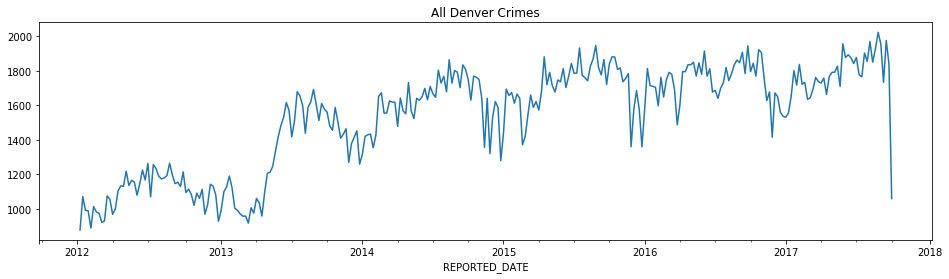

In [170]:
weekly_crimes.plot(figsize=(16, 4), title='All Denver Crimes')

### More
It is possible to use resample even when the index does not contain a Timestamp. You can use the on parameter to select the column with Timestamps that will be used to form groups:

In [171]:
crime2 = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime')
weekly_crimes2 = crime2.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

In [172]:
#Similarly, this is possible using groupby with pd.Grouper by selecting the Timestamp column with the key parameter:
weekly_crimes_gby2 = crime2.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()
weekly_crimes_gby2.equals(weekly_crimes_gby)

True

### Ex2. Aggregating weekly crime and traffic accidents separately

The Denver crime dataset has all crime and traffic accidents together in one table, and separates them through the binary columns, IS_CRIME and IS_TRAFFIC. The resample method allows you to group by a period of time and aggregate specific columns separately.

In this recipe, we will use the resample method to group by each quarter of the year and then sum up the number of crimes and traffic accidents separately.

In [173]:
#Use RESAMPLE method to group by each quarter of the year and then sum the IS_CRIME and IS_TRAFFIC columns for each group:
crime_sort = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [174]:
crime_quarterly = crime.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum()
crime_quarterly

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
...,...,...
2017-03-31,16426,5587
2017-06-30,17486,6148
2017-09-30,17990,6101


In [175]:
#Notice that the dates all appear as the last day of the quarter. This is because the offset alias, Q, represents the end of the quarter. 
#Let's use the offset alias QS to represent the start of the quarter:
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
...,...,...
2017-01-01,16426,5587
2017-04-01,17486,6148
2017-07-01,17990,6101


In [176]:
#verify these results by checking whether the second quarter of data is correct:
crime_sort.loc['2012-04-01':'2012-06-30',['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [177]:
#It is possible to replicate this operation using the groupby method:
crime_quarterly_gby = crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly_gby.equals(crime_quarterly)

True

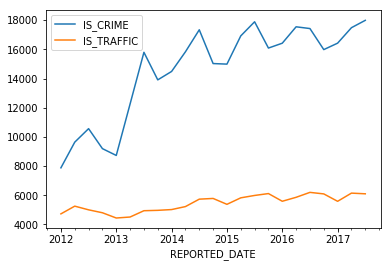

In [178]:
#plot the trends in crime and traffic accidents over time:
crime_quarterly.plot()

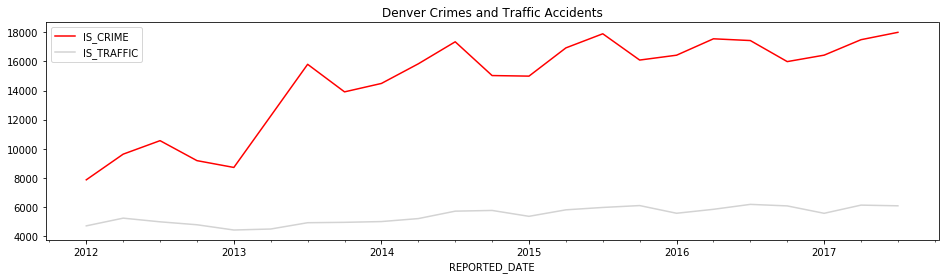

In [179]:
plot_kwargs = dict(figsize=(16,4), 
                       color=['red', 'lightgrey'], 
                       title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)

The plot clearly shows a sharp increase in reported crimes during the first three quarters of the year. There also appears to be a seasonal component to both crime and traffic, with numbers lower in the cooler months and higher in the warmer months.

### More
To get a different visual perspective, we can plot the percentage increase in crime and traffic, instead of the raw count. Let's divide all the data by the first row and plot again:

In [180]:
crime_begin = crime_quarterly.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

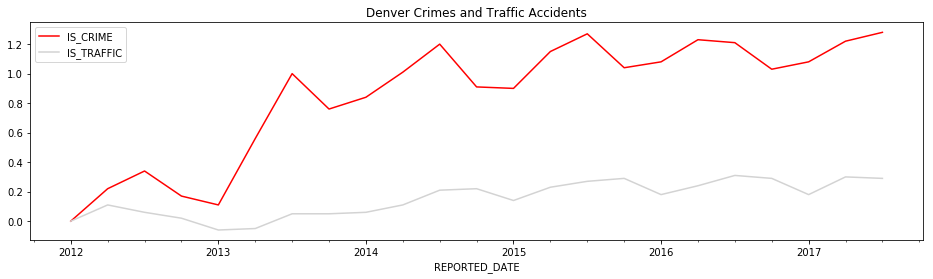

In [181]:
crime_quarterly.div(crime_begin) \
                   .sub(1) \
                   .round(2) \
                   .plot(**plot_kwargs)

### Ex3. Measuring crime by weekday and year
Measuring crimes by weekday and by year simultaneously necessitate the functionality to pull this information directly from a Timestamp. Thankfully, this functionality is built into any column consisting of Timestamps with the dt accessor.

In this recipe, we will use the dt accessor to provide us with both the weekday name and year of each crime as a Series. We count all of the crimes by forming groups using both of these Series. Finally, we adjust the data to consider partial years and population before creating a heatmap of the total amount of crime.

In [182]:
crime = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime')

All Timestamp columns have a special attribute called the dt accessor, which gives access to a variety of extra attributes and methods specifically designed for them. Let's find the weekday name of each REPORTED_DATE and then count these values:

In [183]:
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
             ...  
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

The weekends appear to have substantially less crime and traffic accidents. Let's put this data in correct weekday order and make a horizontal bar plot:

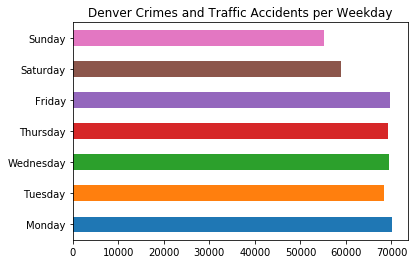

In [184]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

In [185]:
# This task could have also been accomplished with the .loc indexer like this:
wd_counts.loc[days]

Monday       70024
Tuesday      68394
Wednesday    69538
             ...  
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

very similar procedure to plot the count by year:

In [186]:
#my attempt
year_counts = crime['REPORTED_DATE'].dt.year.value_counts()
year_counts

2016    91076
2015    89148
2014    84421
2017    69702
2013    69527
2012    57037
Name: REPORTED_DATE, dtype: int64

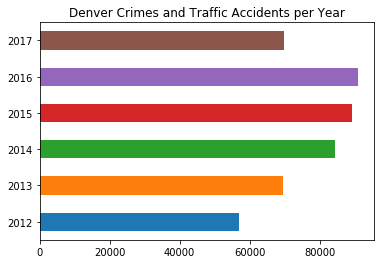

In [187]:
title = 'Denver Crimes and Traffic Accidents per Year' 
crime['REPORTED_DATE'].dt.year.value_counts() \
                             .sort_index() \
                             .plot(kind='barh', title=title)

We need to group by both weekday and year. One way of doing this is saving the weekday and year Series to separate variables and then using these variables with the groupby method:

In [188]:
weekday = crime['REPORTED_DATE'].dt.weekday_name
year = crime['REPORTED_DATE'].dt.year
year

0         2014
1         2014
2         2014
          ... 
460908    2017
460909    2017
460910    2017
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [189]:
#crime_wd_y = crime.groupby([year, weekday]).size() #$bug
#fix, refer to: https://github.com/pandas-dev/pandas/issues/21075

crime_wd_y = crime.groupby([crime['REPORTED_DATE'].dt.year.rename('year'), crime['REPORTED_DATE'].dt.weekday_name.rename('weekday')]).size()
crime_wd_y.head(10)

year  weekday 
2012  Friday       8549
      Monday       8786
      Saturday     7442
                  ...  
2013  Friday      10380
      Monday      10627
      Saturday     8875
Length: 10, dtype: int64

We have aggregated the data correctly but the structure isn't exactly conducive to make comparisons easily. Let's first rename those meaningless index level names and then unstack the weekday level to get us a more readable table:

In [190]:
#To ease the readability, we pivot the weekday level into horizontal column names with unstack.
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


We now have a nicer representation that is easier to read but noticeably, the 2017 numbers are incomplete. To help make a fairer comparison, we can make a simple linear extrapolation to estimate the final number of crimes. Let's first find the last day that we have data for in 2017:

In [191]:
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

A naive estimate would be to assume a constant rate of crime throughout the year and simply multiply all values in the 2017 table by 365/272. However, we can do a little better and look at our historical data and calculate the average percentage of crimes that have taken place through the first 272 days of the year:

In [192]:
round(272 / 365, 3)

# We first create a boolean Series by testing whether each crime was committed on or before the 272nd day of the year
# From here, we again use the flexible groupby method to form groups by the previously calculated year Series and 
#then use the mean method to find the percentage of crimes committed on or before the 272nd day for each year.
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
                                      .groupby(year) \
                                      .mean() \
                                      .round(3)

In [193]:
crime_pct.loc[2012:2016].median()

0.748

It turns out, perhaps very coincidentally, that the percentage of crimes that happen during the first 272 days of the year is almost exactly proportional to the percentage of days passed in the year. Let's now update the row for 2017 and change the column order to match the weekday order:

In [194]:
# adjust this row by dividing by the median percentage found
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table = crime_table.reindex(columns=days)
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


Make a bar or line plot but this is also a good situation for a heatmap, which is available with the seaborn library:  
 The cmap parameter takes a string name of the several dozen available matplotlib colormaps (http://bit.ly/2yJZOvt).

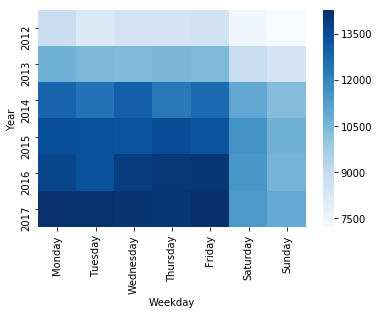

In [195]:
import seaborn as sns
sns.heatmap(crime_table, cmap='Blues')

Crime seems to be rising every year but this data does not account for rising population. Let's read in a table for the Denver population for each year that we have data:

In [196]:
denver_pop = pd.read_csv('data/bookPandasCookbook/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


Many crime metrics are reported as rates per 100,000 residents. Let's divide the population by 100,000 and then divide the raw crime counts by this number to get the crime rate per 100,000 residents:

In [197]:
#a fairly tricky operation
#We still can't simply divide these two objects as, by default, division between a DataFrame and a Series aligns the columns of the DataFrame with the index of the Series, like this:
#crime_table / den_100k

#We need the index of the DataFrame to align with the index of Series and to do this, 
#we use the div method, which allows us to change the direction of alignment with the axis parameter.

In [198]:
den_100k = denver_pop.div(100000).squeeze()
crime_table2 = crime_table.div(den_100k, axis='index').astype('int')
crime_table2

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


Once again, we can make a heatmap that, even after adjusting for population increase, looks nearly identical to the first one:

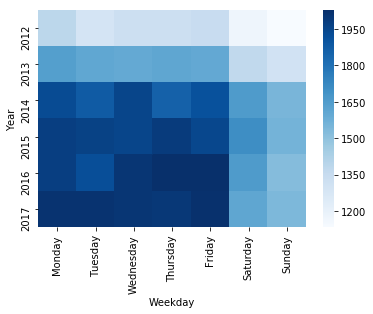

In [199]:
sns.heatmap(crime_table2, cmap='Blues')

### More
Let's finalize this analysis by writing a function to complete all the steps of this recipe at once and add the ability to choose a specific type of crime:

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


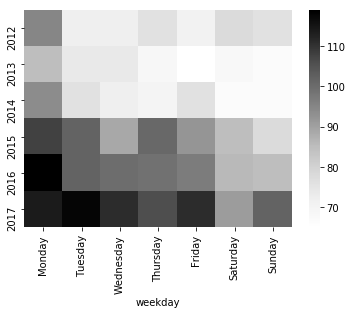

In [200]:
ADJ_2017 = .748

def count_crime(df, offense_cat):
    df = df[df['OFFENSE_CATEGORY_ID'] == offense_cat]
    #weekday = df['REPORTED_DATE'].dt.weekday_name $acbug
    #year = df['REPORTED_DATE'].dt.year

    ct = df.groupby([df['REPORTED_DATE'].dt.year.rename('year'),  df['REPORTED_DATE'].dt.weekday_name.rename('weekday')]).size().unstack()
    ct.loc[2017] = ct.loc[2017].div(ADJ_2017).astype('int')

    pop = pd.read_csv('data/bookPandasCookbook/denver_pop.csv', index_col='Year')
    pop = pop.squeeze().div(100000)

    ct = ct.div(pop, axis=0).astype('int')
    ct = ct.reindex(columns=days)
    sns.heatmap(ct, cmap='Greys')
    return ct

count_crime(crime, 'auto-theft')

### Ex4. Grouping
In this recipe, we will show the versatility of using the groupby method for DataFrames that have a DatetimeIndex.

In [202]:
crime_sort = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime') \
                   .set_index('REPORTED_DATE') \
                   .sort_index()

The DatetimeIndex itself has many of the same attributes and methods as a pandas Timestamp. Let's take a look at some that they have in common:

In [203]:
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
print([attr for attr in common_attrs if attr[0] != '_'])

['min', 'day', 'to_pydatetime', 'freq', 'is_quarter_end', 'month_name', 'days_in_month', 'date', 'microsecond', 'quarter', 'round', 'minute', 'weekofyear', 'normalize', 'is_leap_year', 'resolution', 'hour', 'is_year_end', 'second', 'is_month_start', 'weekday_name', 'daysinmonth', 'weekday', 'to_period', 'week', 'tz', 'day_name', 'is_quarter_start', 'to_julian_date', 'is_year_start', 'year', 'nanosecond', 'floor', 'month', 'tz_localize', 'dayofweek', 'tz_convert', 'time', 'tzinfo', 'strftime', 'ceil', 'dayofyear', 'is_month_end', 'freqstr', 'max']


In [204]:
#We can then use the index to find weekday names, similarly to what was done in step 2 of the preceding recipe:
crime_sort.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
             ...  
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

GROUPBY method has the ability to accept a function as an argument. 

We take advantage of the special ability of the groupby method to accept a function that is passed the DatetimeIndex. The x in the anonymous function is literally the DatetimeIndex and we use it to retrieve the weekday name.


This function will be implicitly passed the index and its return value is used to form groups. Let's see this in action by grouping with a function that turns the index into a weekday name and then counts the number of crimes and traffic accidents separately:

In [205]:
crime_sort.groupby(lambda x: x.weekday_name)['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
...,...,...
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


It is possible to pass groupby a list of any number of custom functions, as done in step 5. Here, the first function uses the round DatetimeIndex method to round each value to the nearest second hour. The second function retrieves the year. 

You can use a list of functions to group by both the hour of day and year, and then reshape the table to make it more readable:

In [207]:
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_group = crime_sort.groupby(funcs)['IS_CRIME', 'IS_TRAFFIC'].sum()
cr_group

IS_CRIME  IS_TRAFFIC
0  2012      2422         919
   2013      4040         792
   2014      5649         978
...           ...         ...
22 2015      5626        1671
   2016      5637        1472
   2017      4358        1072

[72 rows x 2 columns]

After the grouping and aggregating, we unstack the years as columns. 

In [208]:
cr_final = cr_group.unstack()
cr_final.style.highlight_max(color='lightgrey')

#### Findings:  
Crime is reported most often between 3 and 5 p.m. Most traffic accidents occur between 5 p.m. and 7 p.m.

### More
The final result of this recipe is a DataFrame with MultiIndex columns. Using this DataFrame, it is possible to select just the crime or traffic accidents separately. The xs method allows you to select a single value from any index level. Let's see an example where we select only the section of data dealing with traffic:

In [209]:
cr_final.xs('IS_TRAFFIC', axis='columns', level=0).head()

,2012,2013,2014,2015,2016,2017
0,919,792,978,1136,980,782
2,718,652,779,773,718,537
4,399,378,424,471,464,313
6,411,399,479,494,593,462
8,1957,1955,2210,2331,2372,1828


This is referred to as taking a cross section in pandas. We must use the axis and level parameters to specifically denote where our value is located. Let's use xs again to select only data from 2016, which is in a different level:

In [210]:
cr_final.xs(2016, axis='columns', level=1).head()

,IS_CRIME,IS_TRAFFIC
0,5377,980
2,4091,718
4,3044,464
6,2108,593
8,4488,2372


#### Reference
Pandas official documentation of the cross section method xs (http://bit.ly/2xkLzLv)

### Grouping by a Timestamp and another column
The resample method on its own, is unable to group by anything other than periods of time. The groupby method, however, has the ability to group by both periods of time and other columns.

In this recipe, we will show two very similar but different approaches to group by Timestamps and another column.

The read_csv function in step 1 allows to both convert columns into Timestamps and put them in the index at the same time creating a DatetimeIndex.

In [211]:
#Read in the employee dataset, and create a DatetimeIndex with the HIRE_DATE column:
employee = pd.read_csv('data/bookPandasCookbook/employee.csv', 
                           parse_dates=['JOB_DATE', 'HIRE_DATE'], 
                           index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


First do a simple grouping by just gender, and find the average salary for each:

Steps 2 does a simple groupby operation with a single grouping column, gender.

In [220]:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

Let's find the average salary based on hire date, and group everyone into 10-year buckets:

Step 3 uses the resample method with the offset alias 10AS to form groups in 10-year increments of time. The A is the alias for year and the S informs us that the beginning of the period is used as the label. For instance, the data for the label 1988-01-01 spans that date until December 31, 1997.

In [229]:
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
                ...   
1998-01-01     58200.0
2008-01-01     47200.0
2018-01-01         NaN
Name: BASE_SALARY, Length: 7, dtype: float64

In step 4, for each gender, male and female, completely different starting dates for the 10-year periods are calculated based on the earliest hired employee.

If we wanted to group by both gender and a five-year time span, we can call resample directly after calling groupby:

In [234]:
#my attempt
#employee.groupby('GENDER').resample('5AS')['BASE_SALARY'].mean().round(-2)

sal_avg = employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)

Now, this does what we set out to do, but we run into a slight issue whenever we want to compare female to male salaries. Let's unstack the gender level and see what happens:

In [235]:
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
...,...,...
2015-01-01,38600.0,NaN
2018-01-01,NaN,NaN
2025-01-01,NaN,NaN


Step 6 verifies that the year of the earliest hired employee for each gender matches the output from step 4. Step 5 shows how this causes misalignment when we try to compare salaries of females to males. They don't have the same 10-year periods.

The 10-year periods for males and females do not begin on the same date. This happened because the data was first grouped by gender and then, within each gender, more groups were formed based on hire dates. Let's verify that the first hired male was in 1958 and the first hired female was in 1975:

In [236]:
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [237]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

To alleviate this issue, we must group both the gender and Timestamp together. The resample method is only capable of grouping by a single column of Timestamps. We can only complete this operation with the groupby method. With pd.Grouper, we can replicate the functionality of resample. We simply pass the offset alias to the freq parameter and then place the object in a list with all the other columns that we wish to group, as done in step 7. As both males and females now have the same starting dates for the 10-year period, the reshaped data in step 8 will align for each gender making comparisons much easier. It appears that male salaries tend to be higher given a longer length of employment, though both genders have the same average salary with under 10 years of employment.

To resolve this issue, we must group the date together with the gender, and this is only possible with the groupby method:

In [239]:
sal_avg2 = employee.groupby(['GENDER', 
                                 pd.Grouper(freq='10AS')])['BASE_SALARY'].mean().round(-2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01        NaN
        1978-01-01    57100.0
        1988-01-01    57100.0
                       ...   
Male    1988-01-01    64600.0
        1998-01-01    59700.0
        2008-01-01    47200.0
Name: BASE_SALARY, Length: 11, dtype: float64

In [240]:
#Now we can unstack the gender and get our rows aligned perfectly:
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0
1958-01-01,NaN,81200.0


### More
From an outsider's perspective, it would not be obvious that the rows from the output in step 8 represented 10-year intervals. One way to improve the index labels would be to show the beginning and end of each time interval. We can achieve this by concatenating the current index year with 9 added to itself:

In [241]:
years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0
1958-1967,NaN,81200.0


There is actually a completely different way to do this recipe. We can use the cut function to create equal-width intervals based on the year that each employee was hired and form groups from it:

In [242]:
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

array([Interval(1958.0, 1970.0, closed='right'),
       Interval(1970.0, 1981.0, closed='right'),
       Interval(1981.0, 1993.0, closed='right'),
       Interval(1993.0, 2004.0, closed='right'),
       Interval(2004.0, 2016.0, closed='right')], dtype=object)

In [243]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY'] \
            .mean().unstack('GENDER').round(-2)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


### Ex5. Finding the last time crime was 20% lower with merge_asof
There are frequently times where we would like to know when the last time something happened. For example, we might be interested in the last time unemployment was below 5% or the last time the stock market went up five days in a row or the last time you had eight hours of sleep. The merge_asof function provides answers to these types of questions.

In this recipe, we will find the current month's total number of crimes for each offense category and then find the last time there were 20% fewer incidences.

In [247]:
#Read in the Denver crime dataset, place the REPORTED_DATE in the index, and sort it:
crime_sort = pd.read_hdf('data/bookPandasCookbook/crime.h5', 'crime') \
    .set_index('REPORTED_DATE') \
    .sort_index()

Find the last full month of data:

In [248]:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

As we don't quite have all of September's data, let's drop it from our dataset:

In [269]:
#After reading in our data, we decide not to include the 2017 September data, as it is not quite a complete month. 
#We use a partial date string to slice all the way up to and including any crimes in August of 2017. 
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

Let's count the number of crimes and traffic accidents for every month:

In [270]:
#In step 4, we tally all the crimes for each offense category per month
all_data = crime_sort.groupby([pd.Grouper(freq='M'),
                                   'OFFENSE_CATEGORY_ID']).size()
all_data.head()

REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     aggravated-assault     113
               all-other-crimes       124
               arson                    5
               auto-theft             275
               burglary               343
dtype: int64

Although the merge_asof function can work with the index, it will be easier to just reset it:

In [271]:
#and in step 5, we sort by this total, which is required for merge_asof.
all_data = all_data.sort_values().reset_index(name='Total')
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12-31,murder,1
1,2013-01-31,arson,1
2,2016-05-31,murder,1
3,2012-12-31,murder,1
4,2016-12-31,murder,1


Let's get the current month's crime count and make a new column to represent the goal:

In [272]:
#In step 6, we select the most recent data into a separate DataFrame. 
#We will use this month of August as our baseline and create a column, Total_Goal, that is 20% less than the current. 
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'] \
                   .reset_index(drop=True)
goal['Total_Goal'] = goal['Total'].mul(.8).astype(int)
goal.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110


In [267]:
all_data.dtypes
goal.dtypes #$bug -> Total_Goal is int32
type(goal)
goal['Total_Goal'] = goal['Total_Goal'].astype('int64')
goal.dtypes

REPORTED_DATE          datetime64[ns]
OFFENSE_CATEGORY_ID          category
Total                           int64
Total_Goal                      int64
dtype: object

Now use the merge_asof function to find the last time a monthly crime total was less than the column Total_Goal for each offense category:

In step 7, we use merge_asof to find the last time a monthly crime count was less than the Total_Goal column.

In [268]:
#$bug - see fix above
#error: incompatible merge keys [1] int32 and int64, must be the same type
pd.merge_asof(goal, all_data, left_on='Total_Goal',
                  right_on='Total', by='OFFENSE_CATEGORY_ID',
                  suffixes=('_Current', '_Last'))

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08-31,murder,7,5,2017-01-31,5
1,2017-08-31,arson,7,5,2012-01-31,5
2,2017-08-31,sexual-assault,57,45,2013-01-31,45
...,...,...,...,...,...,...
12,2017-08-31,public-disorder,878,702,2015-12-31,699
13,2017-08-31,all-other-crimes,1583,1266,2016-11-30,1264
14,2017-08-31,traffic-accident,2126,1700,2013-12-31,1697


### More
In addition to the Timestamp and Timedelta data types, pandas offers the Period type to represent an exact time period. For example, 2012-05 would represent the entire month of May, 2012. You can manually construct a Period in the following manner:

In [273]:
pd.Period(year=2012, month=5, day=17, hour=14, minute=20, freq='T')

Period('2012-05-17 14:20', 'T')

This object represents the entire minute of May 17, 2012 at 2:20 p.m. It is possible to use these Periods in step 4 instead of grouping by date with pd.Grouper. DataFrames with a DatetimeIndex have the to_period method to convert Timestamps to Periods. It accepts an offset alias to determine the exact length of the time period.

In [274]:
ad_period = crime_sort.groupby([lambda x: x.to_period('M'), 
                                    'OFFENSE_CATEGORY_ID']).size()
ad_period = ad_period.sort_values() \
                         .reset_index(name='Total') \
                         .rename(columns={'level_0':'REPORTED_DATE'})
ad_period.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12,murder,1
1,2013-01,arson,1
2,2016-05,murder,1
3,2012-12,murder,1
4,2016-12,murder,1


Let's verify that the last two columns from this DataFrame are equivalent to all_data from step 5:

In [275]:
cols = ['OFFENSE_CATEGORY_ID', 'Total']
all_data[cols].equals(ad_period[cols])

True

Steps 6 and 7 can now be replicated in almost the exact same manner with the following code:


In [285]:
aug_2018 = pd.Period('2017-8', freq='M')
goal_period = ad_period[ad_period['REPORTED_DATE'] == aug_2018] \
                           .reset_index(drop=True)
goal_period['Total_Goal'] = goal_period['Total'].mul(.8).astype(int)

#$bug same again, fix
goal_period['Total_Goal'] = goal_period['Total_Goal'].astype('int64')


pd.merge_asof(goal_period, ad_period, left_on='Total_Goal',
                  right_on='Total', by='OFFENSE_CATEGORY_ID',
                  suffixes=('_Current', '_Last')).head()

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08,murder,7,5,2017-01,5
1,2017-08,arson,7,5,2012-01,5
2,2017-08,sexual-assault,57,45,2013-01,45
3,2017-08,robbery,108,86,2015-03,86
4,2017-08,white-collar-crime,138,110,2016-10,110
